## 1. Dataset Characteristics and Exploratory Data Analysis

### 1.1 Load, View Data and Show Analysis on Rows and Columns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv('TrafficLabelling/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv('TrafficLabelling/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv('TrafficLabelling/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv('TrafficLabelling/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv('TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv('TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv('TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [5]:
data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 85 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [6]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 85
Total cells: 240613155


In [7]:
for d in data_list: del d 

In [8]:
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

In [9]:
data.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Flow ID                      object 
 1   Source IP                    object 
 2   Source Port                  float64
 3   Destination IP               object 
 4   Destination Port             int64  
 5   Protocol                     float64
 6   Timestamp                    object 
 7   Flow Duration                int64  
 8   Total Fwd Packets            int64  
 9   Total Backward Packets       int64  
 10  Total Length of Fwd Packets  float64
 11  Total Length of Bwd Packets  float64
 12  Fwd Packet Length Max        float64
 13  Fwd Packet Length Min        float64
 14  Fwd Packet Length Mean       float64
 15  Fwd Packet Length Std        float64
 16  Bwd Packet Length Max        float64
 17  Bwd Packet Length Min        float64
 18  Bwd Packet Length Mean       float64
 19  Bwd Pa

In [11]:
pd.options.display.max_rows = 85

print('Overview of Columns:')
data.describe().transpose()

Overview of Columns:


c:\Users\harsh\OneDrive\Desktop\AI powered IDS\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\harsh\OneDrive\Desktop\AI powered IDS\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Source Port,529918.0,4.032859e+04,2.439153e+04,0.000000e+00,11139.000000,52217.000000,5.997200e+04,6.553500e+04
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Protocol,529918.0,1.064988e+01,5.439519e+00,0.000000e+00,6.000000,6.000000,1.700000e+01,1.700000e+01
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03


In [12]:
pd.options.display.max_columns = 80
data

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188,6.0,03/07/2017 08:55:58,4,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188,6.0,03/07/2017 08:55:58,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188,6.0,03/07/2017 08:55:58,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.5-8.254.250.126-49188-80-6,8.254.250.126,80.0,192.168.10.5,49188,6.0,03/07/2017 08:55:58,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.14-8.253.185.121-49486-80-6,8.253.185.121,80.0,192.168.10.14,49486,6.0,03/07/2017 08:56:22,3,2,0,12.0,0.0,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0.0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,NaN,NaN,NaN,NaN,61374,NaN,NaN,61,1,1,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1.0,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
225741,NaN,NaN,NaN,NaN,61378,NaN,NaN,72,1,1,6.0,6.0,6.0,6.0,6.0,0.0,6.0,6.0,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72.0,72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,6.0,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1.0,9.0,6.0,6.0,20,0,0,0,0

### 1.2 Data Cleaning

#### Identifying duplicate values

In [13]:
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 281129


In [14]:
data.drop_duplicates(inplace = True)
data.shape

(2549614, 85)

#### Identifying missing values

In [15]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow ID           2019730
Source IP         2019730
Source Port       2019730
Destination IP    2019730
Protocol          2019730
Timestamp         2019730
Flow Bytes/s          366
dtype: int64


In [16]:
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1325
Flow Packets/s    1691
dtype: int64


In [17]:
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 12118746
Missing values after processing infinite values: 12121762


In [18]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow ID           2019730
Source IP         2019730
Source Port       2019730
Destination IP    2019730
Protocol          2019730
Timestamp         2019730
Flow Bytes/s         1691
Flow Packets/s       1691
dtype: int64


In [19]:
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow ID                2019730                       79.22
Source IP              2019730                       79.22
Source Port            2019730                       79.22
Destination IP         2019730                       79.22
Protocol               2019730                       79.22
Timestamp              2019730                       79.22
Flow Bytes/s              1691                        0.07
Flow Packets/s            1691                        0.07


#### Visualization of Missing Data

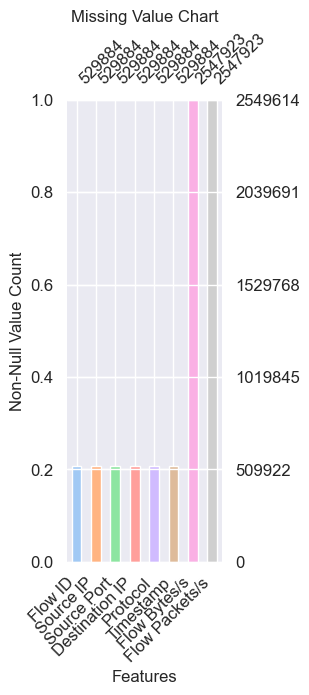

In [20]:
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in data.columns if data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

#### Dealing With Missing Values

In [21]:
columns_to_drop = ['Flow ID', 'Source IP', 'Destination IP', 'Source Port', 'Timestamp', 'Protocol']
data = data.drop(columns = columns_to_drop, axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549614 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  Flow I

In [22]:
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3848.423429201837
Median of Flow Packets/s:  75.5153925541823


In [23]:
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(med_flow_bytes)
data['Flow Packets/s'] = data['Flow Packets/s'].fillna(med_flow_packets)

In [24]:
print('Number of \'Flow Bytes/s\' missing values:', data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [25]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Series([], dtype: int64)


### 1.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plotting Heat Map

In [26]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [27]:
data['Label'].value_counts()

Label
BENIGN                        2123736
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [28]:
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

data['Attack Type'] = data['Label'].map(attack_map)

In [29]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2123736
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [30]:
data.drop('Label', axis = 1, inplace = True)

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [32]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [33]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

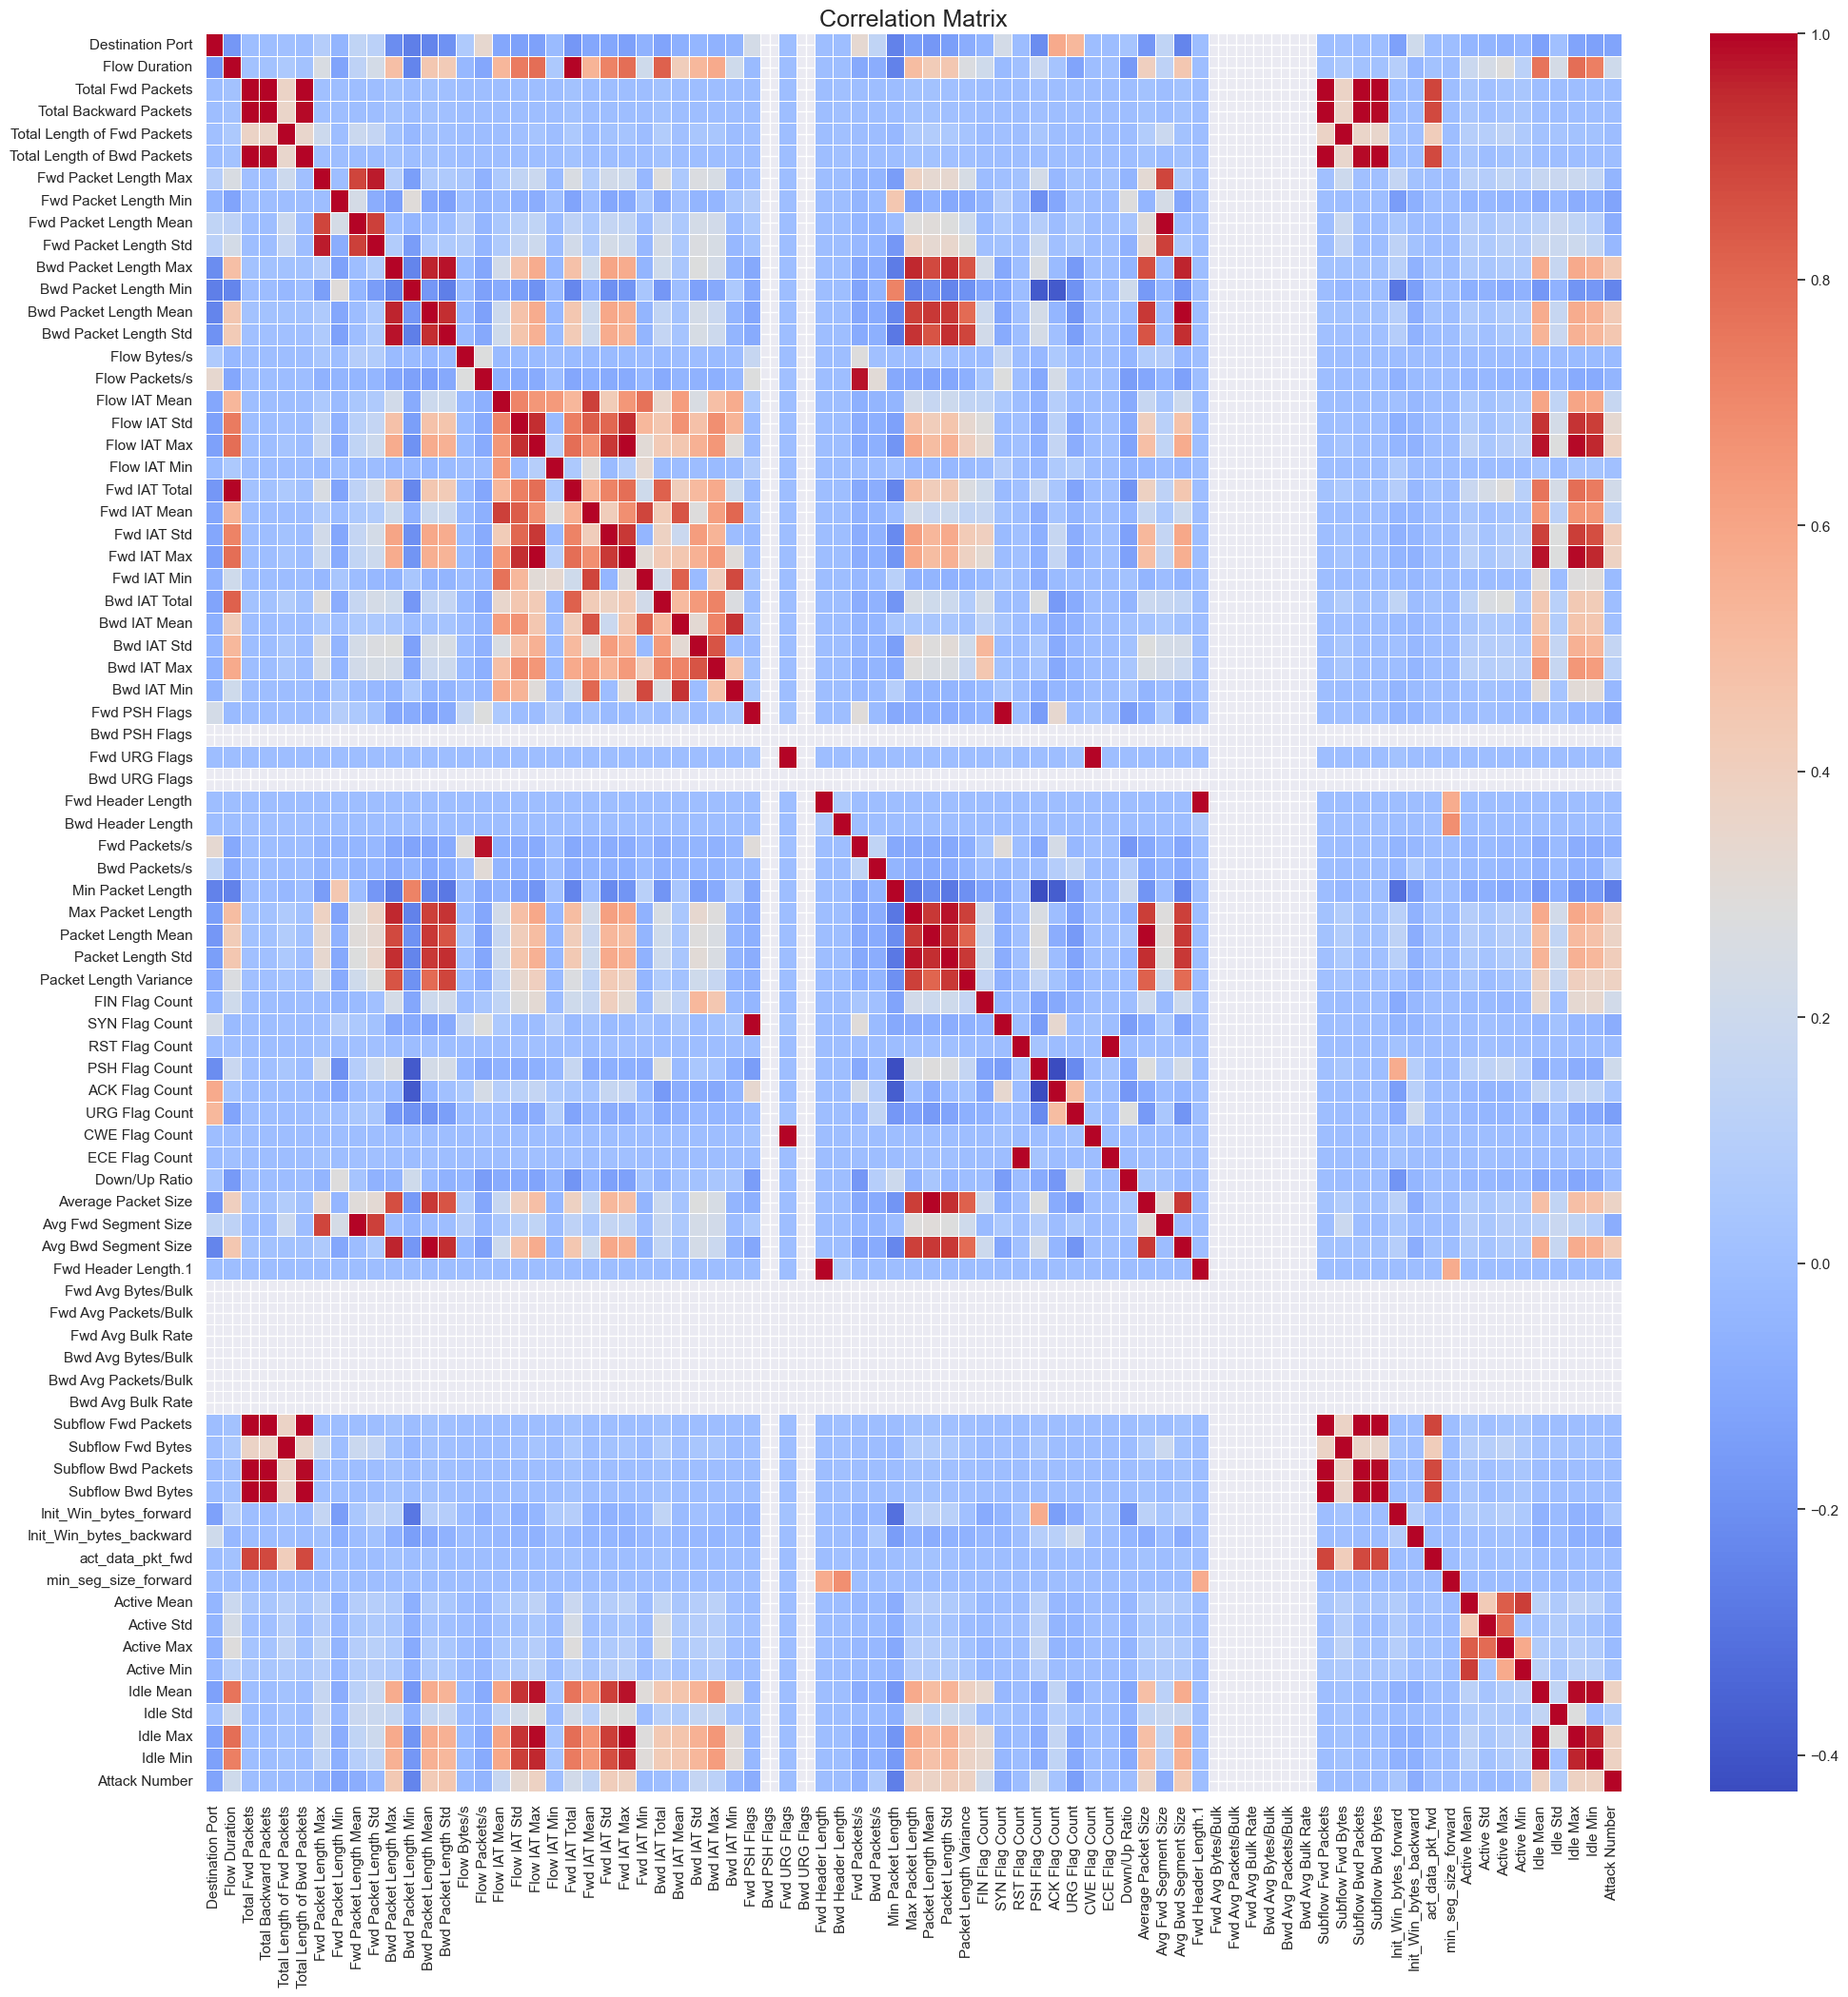

In [34]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [35]:
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.22
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.37
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [36]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 32


In [37]:
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

In [38]:
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(509922, 80)

In [39]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()['mean']  
    new = sampled_data[col].describe()['mean']
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8616.240289           8621.111882           0.06%
Flow Duration                   16409281.771145       16361874.673574       0.29%
Total Fwd Packets               10.189886             11.628857             14.12%
Total Backward Packets          11.452955             13.399724             17.00%
Total Length of Fwd Packets     605.785619            603.696271            0.34%
Total Length of Bwd Packets     17940.278614          22608.759991          26.02%
Fwd Packet Length Max           228.894472            229.103118            0.09%
Fwd Packet Length Min           19.252195             19.387487             0.70%
Fwd Packet Length Mean          63.059399             63.181804             0.19%
Fwd Packet Length Std 

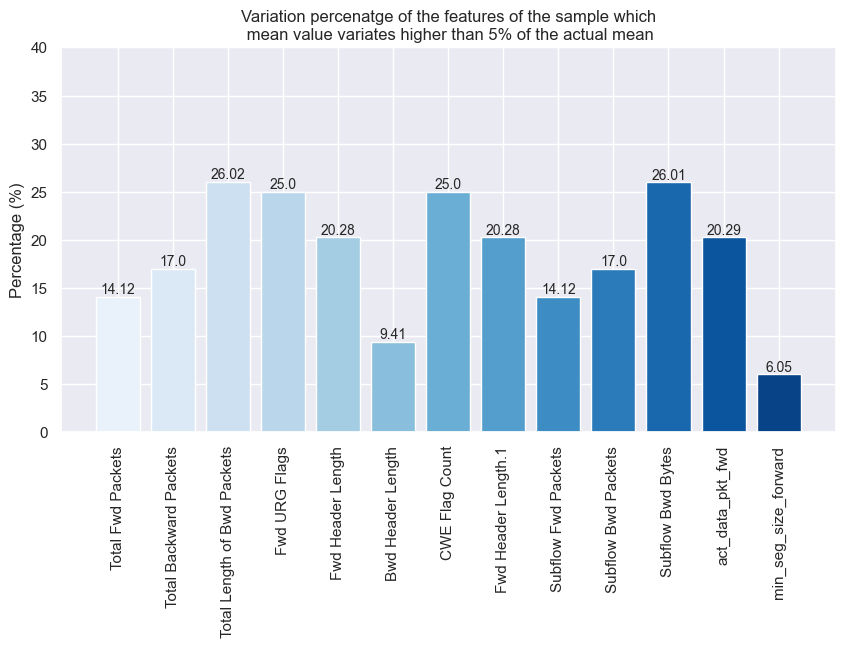

In [40]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [41]:
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Destination Port              : 33531
2.  Flow Duration                 : 256399
3.  Total Fwd Packets             : 667
4.  Total Backward Packets        : 833
5.  Total Length of Fwd Packets   : 8961
6.  Total Length of Bwd Packets   : 24110
7.  Fwd Packet Length Max         : 3644
8.  Fwd Packet Length Min         : 255
9.  Fwd Packet Length Mean        : 36865
10. Fwd Packet Length Std         : 66329
11. Bwd Packet Length Max         : 3900
12. Bwd Packet Length Min         : 452
13. Bwd Packet Length Mean        : 46758
14. Bwd Packet Length Std         : 62708
15. Flow Bytes/s                  : 347405
16. Flow Packets/s                : 288549
17. Flow IAT Mean                 : 274686
18. Flow IAT Std                  : 229350
19. Flow IAT Max                  : 166891
20. Flow IAT Min                  : 46246
21. Fwd IAT Total                 : 119357
22. Fwd IAT Mean                  : 164218
23. Fwd IAT Std                   : 148158
24. Fwd IAT

In [42]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [43]:
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                             Outlier Count  Outlier Percentage
Destination Port                    109657               21.50
Flow Duration                        93461               18.33
Total Fwd Packets                    65732               12.89
Total Backward Packets               47948                9.40
Total Length of Fwd Packets          63685               12.49
Total Length of Bwd Packets         117132               22.97
Fwd Packet Length Max                49424                9.69
Fwd Packet Length Min                 2698                0.53
Fwd Packet Length Mean               35662                6.99
Fwd Packet Length Std                48736                9.56
Bwd Packet Length Max                78872               15.47
Bwd Packet Length Min                13380                2.62
Bwd Packet Length Mean               87776               17.21
Bwd Packet Length Std                99492               19.51
Flow Bytes/s                         96066             

In [44]:
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Destination Port
- BENIGN: 94067 (22.15%)
- Port Scan: 2202 (12.05%)
- DDoS: 0 (0.00%)
- DoS: 0 (0.00%)
- Brute Force: 0 (0.00%)
- Web Attack: 0 (0.00%)
- Bot: 127 (36.60%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 97709 (23.01%)
- Port Scan: 421 (2.30%)
- DDoS: 4308 (16.87%)
- DoS: 8455 (21.81%)
- Brute Force: 434 (22.79%)
- Web Attack: 67 (15.16%)
- Bot: 76 (21.90%)
- Infiltration: 0 (0.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Fwd Packets
- BENIGN: 78050 (18.38%)
- Port Scan: 303 (1.66%)
- DDoS: 804 (3.15%)
- DoS: 463 (1.19%)
- Brute Force: 0 (0.00%)
- Web Attack: 73 (16.52%)
- Bot: 6 (1.73%)
- Infiltration: 1 (20.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Backward Packets
- BENIGN: 72034 (16.96%)
- Port Scan: 96 (0.53%)
- DDoS: 0 (0.00%)
- DoS: 4519 (11.65%)
- Brute Force: 0 (0.00%)
- Web Attack: 47 (10.63%)
- Bot: 6 (1.73%)
- Infiltration: 1 (20.00%)
- Heartbleed: 0 (0.00%)

Feature: Total Length of Fwd Packets
- BENIGN: 8230

#### Visualization of column relationships (Categorical Variables)

C:\Users\harsh\AppData\Local\Temp\ipykernel_428\326211583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


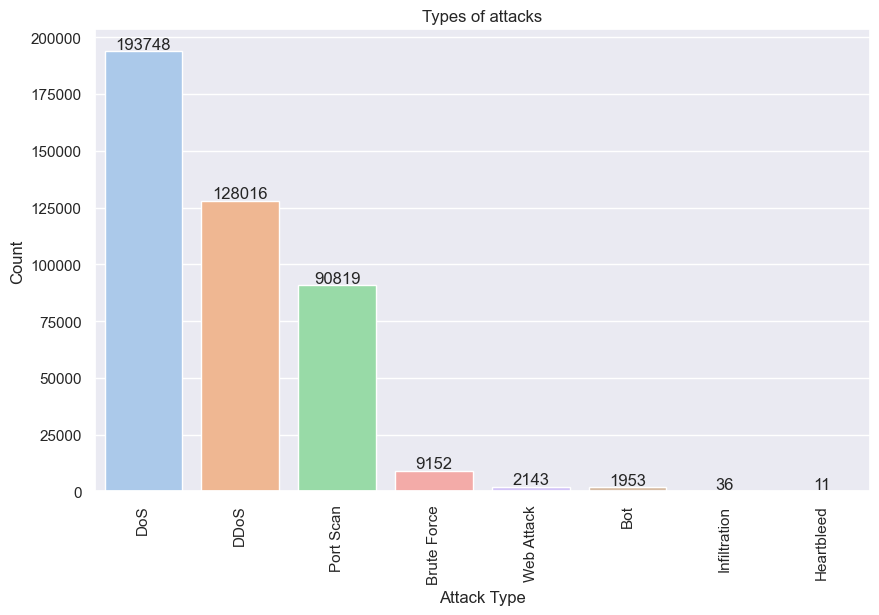

In [45]:
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

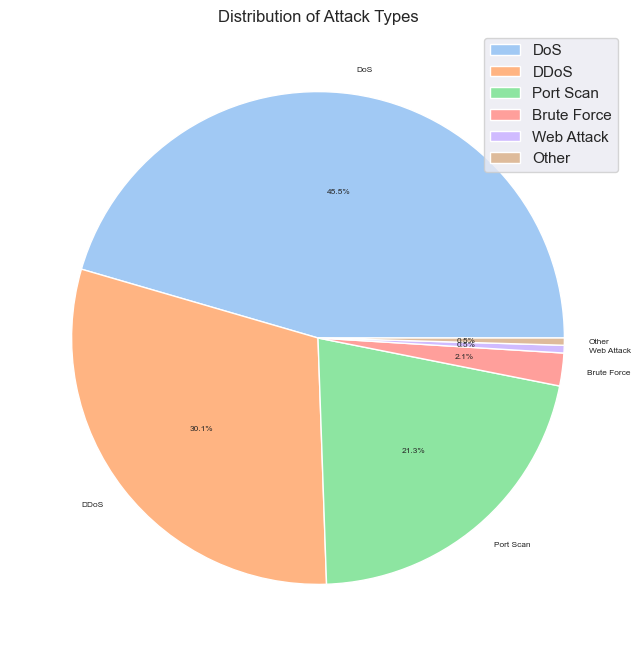

In [46]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [47]:
data.groupby('Attack Type').first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12.0,0.0,6.0,6.0,6.000000,0.000000,0.0,0.0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4.0,4.0,4.0,4.000000e+00,0.000000e+00,4.0,4.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40,0,500000.000000,0.000000,6.0,6.0,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0.0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Bot,8080,60202640,9,9,322.0,256.0,322.0,0.0,35.777778,107.333333,256.0,0.0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000.0,47.0,51200000.0,6.396442e+06,5.268490e+06,10200000.0,234.0,60200000.0,7.518954e+06,4.645137e+06,10300000.0,637.0,0,0,0,0,296,296,0.149495,0.149495,0.0,322.0,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1.0,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175.0,50911.0,10200000.0,34941.27201,10200000.0,10100000.0
Brute Force,80,5216127,3,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882.0,124.0,5216127.0,2.608064e+06,3.686598e+06,5214882.0,1245.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,104,40,0.575139,0.191713,0.0,0.0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0.0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DDoS,80,1293792,3,7,26.0,11607.0,20.0,0.0,8.666667,10.263203,5840.0,0.0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730.0,2.0,747.0,3.735000e+02,5.239661e+02,744.0,3.0,1293746.0,2.156243e+05,5.276719e+05,1292730.0,2.0,0,0,0,0,72,152,2.318765,5.410452,0.0,5840.0,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2.0,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
DoS,80,5169956,8,6,1101.0,4222.0,410.0,0.0,137.625000,185.758628,3525.0,0.0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173.0,112.0,218783.0,3.125471e+04,3.068629e+04,78311.0,219.0,5169833.0,1.033967e+06,2.218975e+06,5002421.0,840.0,0,0,0,0,172,132,1.547402,1.160551,0.0,3525.0,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0.0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0
Heartbleed,444,119302728,2685,1729,8299.0,7556917.0,517.0,0.0,3.090875,16.858421,17376.0,0.0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984.0,0.0,119000000.0,4.444951e+04,2.224617e+05,5025702.0,0.0,119000000.0,6.904091e+04,2.738674e+05,5024984.0,1.

## 2. Data Preprocessing

### Preprocessing

In [48]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Destination Port,2549614.0,8.616240e+03,1.894566e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2549614.0,1.640928e+07,3.507890e+07,-1.300000e+01,202.000000,49667.000000,5.275038e+06,1.200000e+08
Total Fwd Packets,2549614.0,1.018989e+01,7.899185e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2549614.0,1.145295e+01,1.050933e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2549614.0,6.057856e+02,1.052845e+04,0.000000e+00,12.000000,66.000000,3.280000e+02,1.290000e+07
Total Length of Bwd Packets,2549614.0,1.794028e+04,2.384587e+06,0.000000e+00,6.000000,154.000000,8.950000e+02,6.554530e+08
Fwd Packet Length Max,2549614.0,2.288945e+02,7.524123e+02,0.000000e+00,6.000000,40.000000,2.010000e+02,2.482000e+04
Fwd Packet Length Min,2549614.0,1.925219e+01,6.053130e+01,0.000000e+00,0.000000,2.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2549614.0,6.305940e+01,1.945125e+02,0.000000e+00,6.000000,36.000000,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2549614.0,7.645865e+01,2.953104e+02,0.000000e+00,0.000000,0.000000,7.276351e+01,7.125597e+03


In [49]:
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [50]:
data.shape

(2549614, 71)

In [51]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count',

In [52]:
columns_to_keep = [
    'Destination Port',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Bwd Packets',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Bwd Packet Length Max',
    'Bwd Packet Length Mean',
    'Bwd Packet Length Std',
    'Flow Packets/s',
    'Flow IAT Mean',
    'Flow IAT Std',
    'Flow IAT Max',
    'Flow IAT Min',
    'Fwd IAT Total',
    'Fwd IAT Mean',
    'Fwd IAT Max',
    'Fwd IAT Min',
    'Fwd Header Length',
    'Bwd Header Length',
    'Fwd Packets/s',
    'Min Packet Length',
    'Max Packet Length',
    'Packet Length Mean',
    'Packet Length Std',
    'Packet Length Variance',
    'Average Packet Size',
    'Avg Bwd Segment Size',
    'Fwd Header Length.1',
    'Subflow Bwd Bytes',
    'Init_Win_bytes_forward',
    'Init_Win_bytes_backward',
    'min_seg_size_forward',
    'Attack Type'
]

data = data[columns_to_keep]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549614 entries, 0 to 225744
Data columns (total 34 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Total Fwd Packets            int64  
 2   Total Backward Packets       int64  
 3   Total Length of Bwd Packets  float64
 4   Fwd Packet Length Mean       float64
 5   Fwd Packet Length Std        float64
 6   Bwd Packet Length Max        float64
 7   Bwd Packet Length Mean       float64
 8   Bwd Packet Length Std        float64
 9   Flow Packets/s               float64
 10  Flow IAT Mean                float64
 11  Flow IAT Std                 float64
 12  Flow IAT Max                 float64
 13  Flow IAT Min                 float64
 14  Fwd IAT Total                float64
 15  Fwd IAT Mean                 float64
 16  Fwd IAT Max                  float64
 17  Fwd IAT Min                  float64
 18  Fwd Header Length            int64  
 19  Bwd He

In [54]:
unique_counts = data.nunique()  

print("Number of unique values in each column:")
print(unique_counts.to_string())  


Number of unique values in each column:
Destination Port                 53805
Total Fwd Packets                 1432
Total Backward Packets            1747
Total Length of Bwd Packets      64698
Fwd Packet Length Mean          109091
Fwd Packet Length Std           254384
Bwd Packet Length Max             4838
Bwd Packet Length Mean          154284
Bwd Packet Length Std           249206
Flow Packets/s                 1242272
Flow IAT Mean                  1170377
Flow IAT Std                   1057046
Flow IAT Max                    580289
Flow IAT Min                    136316
Fwd IAT Total                   493098
Fwd IAT Mean                    738963
Fwd IAT Max                     437316
Fwd IAT Min                     110631
Fwd Header Length                 3771
Bwd Header Length                 3945
Fwd Packets/s                  1222680
Min Packet Length                  215
Max Packet Length                 5708
Packet Length Mean              226511
Packet Length Std       

In [55]:
attack_encoder = LabelEncoder()

data['attack_encoded'] = attack_encoder.fit_transform(data['Attack Type'])

attack_mapping = dict(zip(attack_encoder.classes_, attack_encoder.transform(attack_encoder.classes_)))

print("Attack Type Mapping:")
for attack, code in attack_mapping.items():
    print(f"{attack}: {code}")


Attack Type Mapping:
BENIGN: 0
Bot: 1
Brute Force: 2
DDoS: 3
DoS: 4
Heartbleed: 5
Infiltration: 6
Port Scan: 7
Web Attack: 8


## 3. Training Random Forest Classifier Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score)
import joblib

In [ ]:
data.drop('attack_encoded', axis = 1, inplace=True)
X = data.drop('Attack Type', axis = 1)
y = data['Attack Type']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2549614 entries, 0 to 225744
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Total Fwd Packets            int64  
 2   Total Backward Packets       int64  
 3   Total Length of Bwd Packets  float64
 4   Fwd Packet Length Mean       float64
 5   Fwd Packet Length Std        float64
 6   Bwd Packet Length Max        float64
 7   Bwd Packet Length Mean       float64
 8   Bwd Packet Length Std        float64
 9   Flow Packets/s               float64
 10  Flow IAT Mean                float64
 11  Flow IAT Std                 float64
 12  Flow IAT Max                 float64
 13  Flow IAT Min                 float64
 14  Fwd IAT Total                float64
 15  Fwd IAT Mean                 float64
 16  Fwd IAT Max                  float64
 17  Fwd IAT Min                  float64
 18  Fwd Header Length            int64  
 19  Bwd He

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [62]:
from xgboost import XGBClassifier

In [65]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

class_counts = np.bincount(y_train_encoded)
total_samples = len(y_train_encoded)
class_weights = total_samples / (len(class_counts)) * (1 / class_counts)

model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    n_estimators=100,
    max_depth=8,
    learning_rate=0.1,
    tree_method='hist',  # Faster training
    eval_metric='mlogloss',
    early_stopping_rounds=10,
    n_jobs=-1,
    random_state=42
)

# Apply class weights through sample_weight
sample_weights = np.array([class_weights[i] for i in y_train_encoded])

model.fit(
    X_train, y_train_encoded,
    sample_weight=sample_weights,  # Critical for imbalance
    eval_set=[(X_test, y_test_encoded)],
    verbose=True
)


[0]	validation_0-mlogloss:1.86662
[1]	validation_0-mlogloss:1.58612
[2]	validation_0-mlogloss:1.39631
[3]	validation_0-mlogloss:1.24351
[4]	validation_0-mlogloss:1.09729
[5]	validation_0-mlogloss:0.99015
[6]	validation_0-mlogloss:0.89882
[7]	validation_0-mlogloss:0.81952
[8]	validation_0-mlogloss:0.74435
[9]	validation_0-mlogloss:0.67821
[10]	validation_0-mlogloss:0.61221
[11]	validation_0-mlogloss:0.55688
[12]	validation_0-mlogloss:0.50504
[13]	validation_0-mlogloss:0.45892
[14]	validation_0-mlogloss:0.41705
[15]	validation_0-mlogloss:0.38005
[16]	validation_0-mlogloss:0.34658
[17]	validation_0-mlogloss:0.31657
[18]	validation_0-mlogloss:0.28952
[19]	validation_0-mlogloss:0.26516
[20]	validation_0-mlogloss:0.24271
[21]	validation_0-mlogloss:0.22251
[22]	validation_0-mlogloss:0.20507
[23]	validation_0-mlogloss:0.18822
[24]	validation_0-mlogloss:0.17298
[25]	validation_0-mlogloss:0.15903
[26]	validation_0-mlogloss:0.14639
[27]	validation_0-mlogloss:0.13449
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1, num_class=9, ...)

In [66]:
y_pred_encoded = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)  # Convert back to original labels

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00    424747
         Bot       0.64      0.99      0.78       391
 Brute Force       1.00      1.00      1.00      1830
        DDoS       1.00      1.00      1.00     25603
         DoS       1.00      1.00      1.00     38750
  Heartbleed       0.67      1.00      0.80         2
Infiltration       0.75      0.86      0.80         7
   Port Scan       0.99      1.00      0.99     18164
  Web Attack       0.94      0.98      0.96       429

    accuracy                           1.00    509923
   macro avg       0.89      0.98      0.93    509923
weighted avg       1.00      1.00      1.00    509923



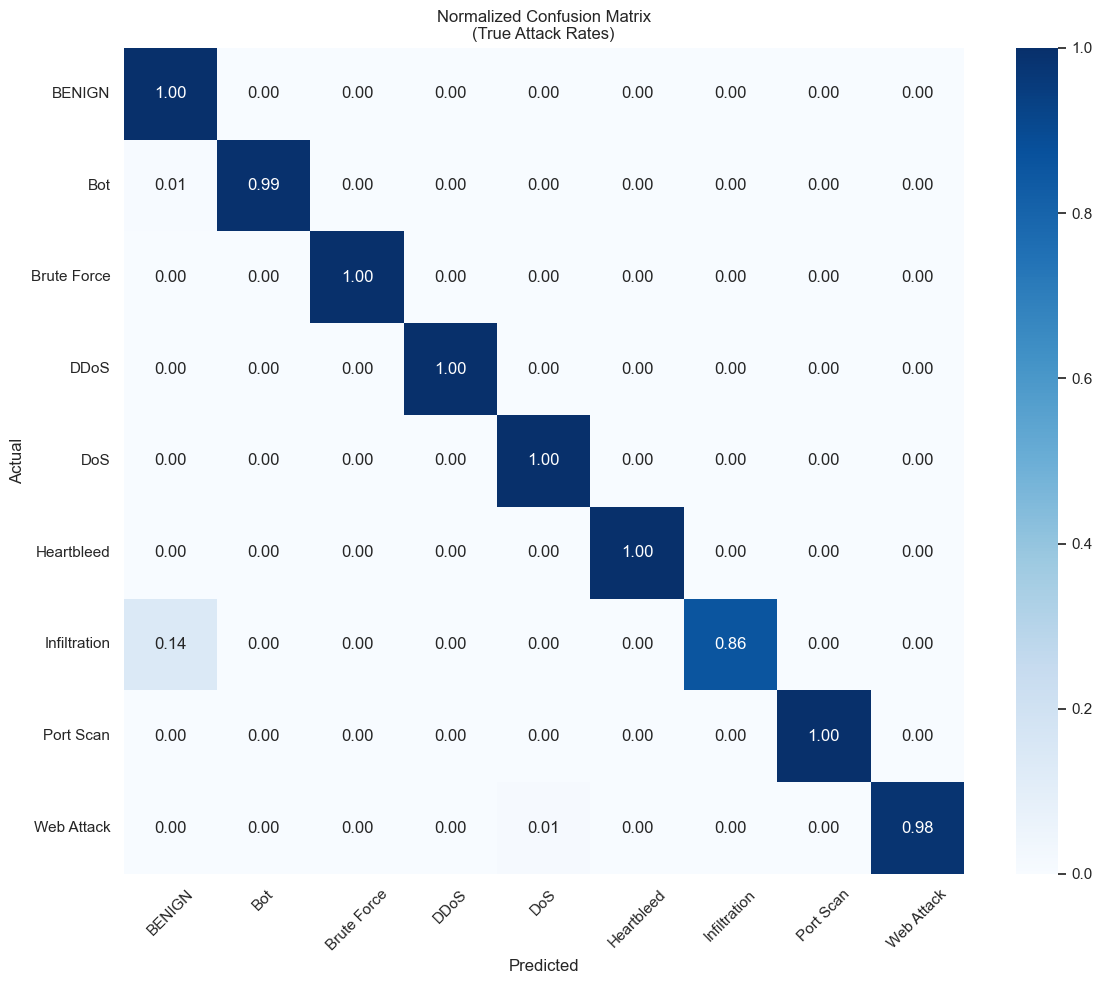

In [67]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm, 
            annot=True, 
            fmt='.2f',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.title('Normalized Confusion Matrix\n(True Attack Rates)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

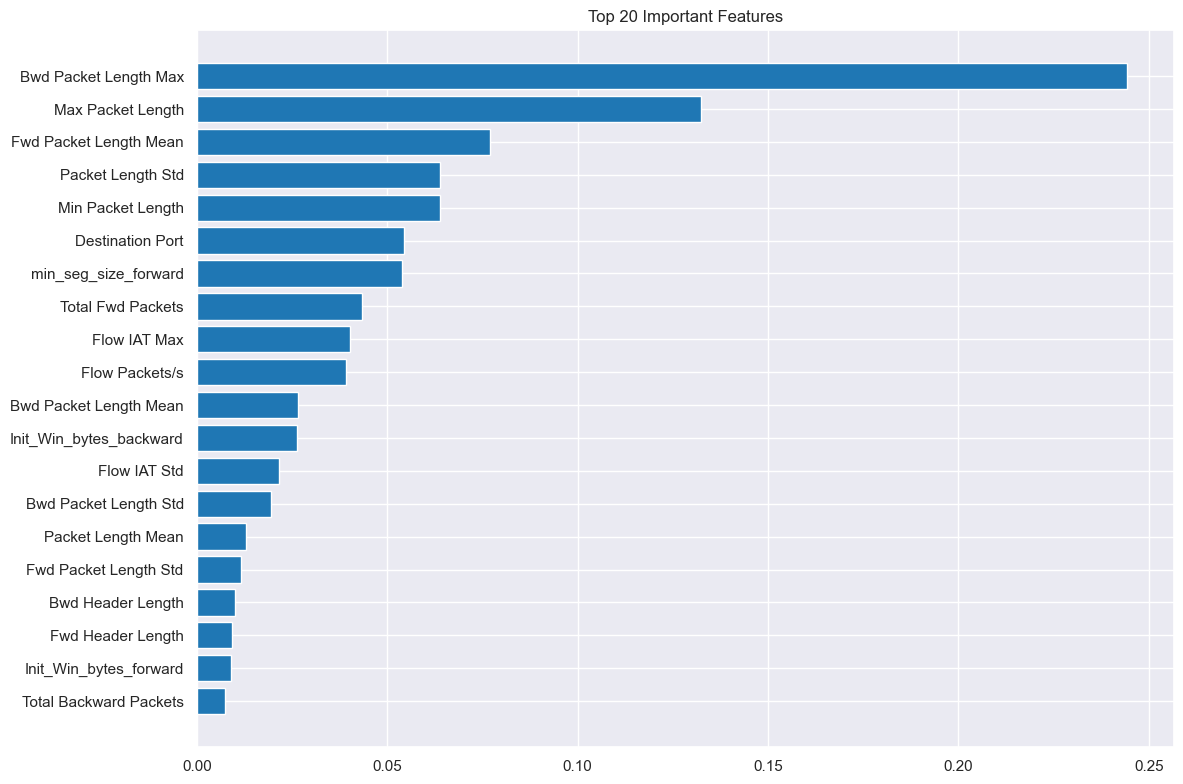

In [68]:
plt.figure(figsize=(12, 8))
sorted_idx = model.feature_importances_.argsort()[-20:]  # Top 20 features
plt.barh(range(len(sorted_idx)), 
        model.feature_importances_[sorted_idx], 
        color='#1f77b4')
plt.yticks(range(len(sorted_idx)), 
          np.array(X_test.columns)[sorted_idx])
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

<Figure size 1200x600 with 0 Axes>

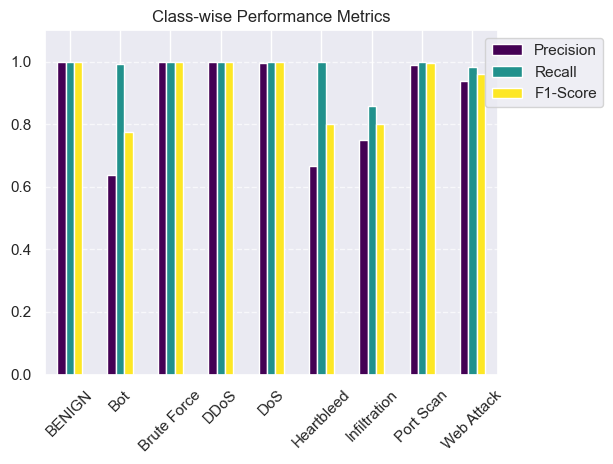

In [69]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=le.classes_)

plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', rot=45, colormap='viridis')
plt.title('Class-wise Performance Metrics')
plt.ylim(0, 1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('class_metrics.png', dpi=300)
plt.show()

c:\Users\harsh\OneDrive\Desktop\AI powered IDS\venv\Lib\site-packages\sklearn\metrics\_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


<Figure size 800x600 with 0 Axes>

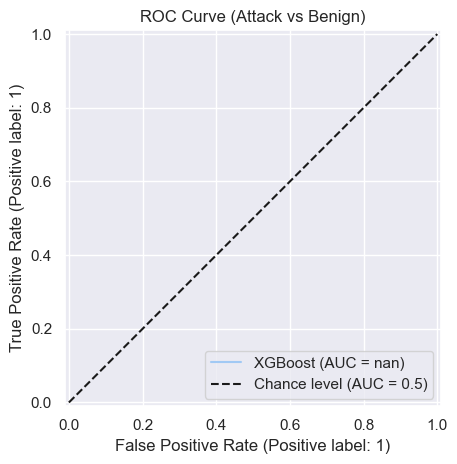

In [72]:
benign_idx = le.transform(['BENIGN'])[0]
attack_probs = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    (y_test != benign_idx).astype(int),
    attack_probs[:, benign_idx],
    name='XGBoost',
    plot_chance_level=True
)
plt.title('ROC Curve (Attack vs Benign)')
plt.tight_layout()
plt.show()


In [73]:
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']